### EA614 2020.1
____
##### Aluno: Marcos Diaz 
##### RA: 221525

____
*Parte Computacional*



### 2.1 Filtro de Chebyshev
Preparação:

In [175]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgn

Rotina fornecida:

In [176]:
""" Funções auxiliares para a resolução do exercício """

""" Rotina que calcula os coeficientes do polinômio de Chebyshev de maneira não-recursiva 

Parâmetros: w - vetor de frequências (sugestão: usar um vetor com amostras de 0 a 20 rad/s)
            wc - freq. de corte do filtro (em rad/s)
            n - ordem do filtro de Chebyshev
Saída:      Tn - vetor com os coeficientes calculados do polinômio de Chebyshev (possui o mesmo tamanho que w)

"""

def calcula_coeficientes(w,wc,n):

    Tn = np.zeros((w.size,))
    #determina os valores dos coeficientes segundo as expressões padronizadas
    Tn[abs(w) < wc] = np.cos(n*np.arccos(w[abs(w) < wc] / wc))
    Tn[abs(w) >= wc] = np.cosh(n*np.arccosh(w[abs(w) >= wc] / wc))
    return Tn
    

Dominio da frequência:

In [177]:
# domínio
num = 100
w = np.linspace(0, 20, num) 


Retorna o Filtro de Chebyshev:

In [178]:
Habs = lambda w, wc, e, n : 1/(np.sqrt(1+(e**2)*(calcula_coeficientes(w,wc,n)**2)))

###### 2.1 (a) Variando a ordem

In [179]:
wc = 5 #rad/s

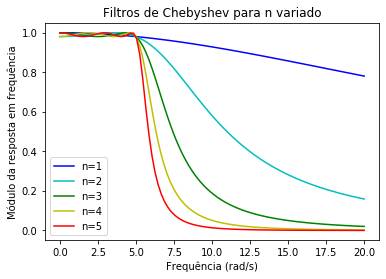

In [180]:
e = 0.2
plt.title("Filtros de Chebyshev para n variado")
plt.xlabel("Frequência (rad/s)")
plt.ylabel("Módulo da resposta em frequência")
cheb1 = Habs(w, wc, e, 1)
go = plt.plot(w, cheb1, 'b', label='n=1')
cheb2 = Habs(w, wc, e, 2)
go = plt.plot(w, cheb2, 'c', label='n=2')
cheb3 = Habs(w, wc, e, 3)
go = plt.plot(w, cheb3, 'g', label='n=3')
cheb4 = Habs(w, wc, e, 4)
go = plt.plot(w, cheb4, 'y', label='n=4')
cheb5 = Habs(w, wc, e, 5)
go = plt.plot(w, cheb5, 'r', label='n=5')
leg =plt.legend()

Observa-se no gráfico como a ordem do polinômio de Chebyshev é responsável por uma transição mais suave ou mais abrupta.

###### 2.1 (b) Variando o ganho na frequência de corte

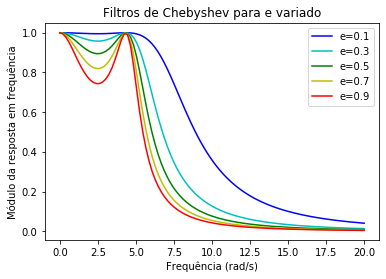

In [181]:
n=3
plt.title("Filtros de Chebyshev para e variado")
plt.xlabel("Frequência (rad/s)")
plt.ylabel("Módulo da resposta em frequência")
cheb1 = Habs(w, wc, 0.1, n)
go = plt.plot(w, cheb1, 'b', label='e=0.1')
cheb2 = Habs(w, wc, 0.3, n)
go = plt.plot(w, cheb2, 'c', label='e=0.3')
cheb3 = Habs(w, wc, 0.5, n)
go = plt.plot(w, cheb3, 'g', label='e=0.5')
cheb4 = Habs(w, wc, 0.7, n)
go = plt.plot(w, cheb4, 'y', label='e=0.7')
cheb5 = Habs(w, wc, 0.9, n)
go = plt.plot(w, cheb5, 'r', label='e=0.9')
leg =plt.legend()

Observa-se pelo gráfico que todos os filtros tem módulo igual a 1 na frequência de corte (5 rad/s). No entanto, o parâmetro ganho na frequência de corte (e) controla a variação do sinal antes de chegar nessa frequência: há um ganho maior para valores maiores do parâmetro.

### 2.2 Filtro de Butterworth
Preparação:

In [182]:
Babs = lambda w, wc, n : 1/(np.sqrt(1+(w/wc)**(2*n)))

###### 2.2 (c) Variando a ordem

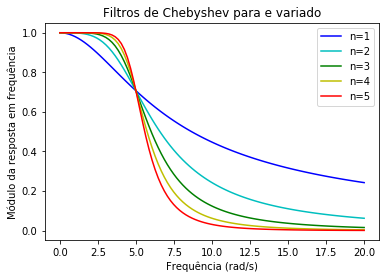

In [183]:
wc=5
plt.title("Filtros de Chebyshev para e variado")
plt.xlabel("Frequência (rad/s)")
plt.ylabel("Módulo da resposta em frequência")
butter1 = Babs(w, wc, 1)
go = plt.plot(w, butter1, 'b', label='n=1')
butter2 = Babs(w, wc, 2)
go = plt.plot(w, butter2, 'c', label='n=2')
butter3 = Babs(w, wc, 3)
go = plt.plot(w, butter3, 'g', label='n=3')
butter4 = Babs(w, wc, 4)
go = plt.plot(w, butter4, 'y', label='n=4')
butter5 = Babs(w, wc, 5)
go = plt.plot(w, butter5, 'r', label='n=5')
leg =plt.legend()

Observa-se pelo gráfico que a ordem do filtro é diretamente proporcional ao valor absoluto da derivada do filtro em torno da frequência de corte: ordens menores proporcionam um filtro mais suave; ordens maiores têm transição mais abrupta na frequência de corte, se aproximando melhor de um filtro passa-baixas ideal.

### 2.3 Filtragem de um pulso retangular
Preparação:

###### 2.1 (d) Transformada de x(t)

Transformada de x(t)

Como o sinal x(t) é real e par, X(jw) é real e par. Asssim X(jw) = modulo de X(jw)

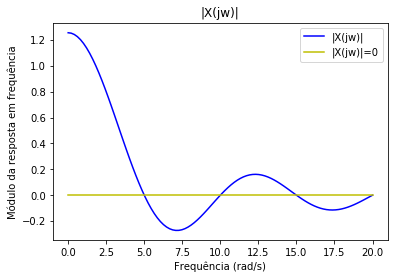

In [184]:
wc = 5
T = 2*np.pi/wc
#problema da divisao por zero (w=0)
X = T*np.sin(w[1:]*T/2)/(w[1:]*T/2)
#adiciono manulamente o valor X(0)=T
X=np.hstack((np.array([T]), X))
plt.title("|X(jw)|")
plt.xlabel("Frequência (rad/s)")
plt.ylabel("Módulo da resposta em frequência")
go = plt.plot(w, X, 'b', label= "|X(jw)|")
#linha em 0
line=plt.plot(w, [0 for i in w], 'y', label="|X(jw)|=0")
leg =plt.legend()

Na faixa de domínio usada pelo gráfico, é possível observar 4 raízes, a partir da frequência 5rad/s, igualmente espaçadas por 5rad/s. 

###### 2.1 (e) Filtro passa-baixas ideal

Como o filtro é real, podemos

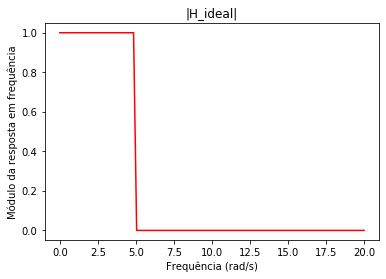

In [185]:
H_ideal = np.zeros(w.size)
H_ideal[w<wc]=1
plt.title("|H_ideal|")
plt.xlabel("Frequência (rad/s)")
plt.ylabel("Módulo da resposta em frequência")
go = plt.plot(w, H_ideal, 'r')

Filtragem de x(t) pelo passa-baixas ideal

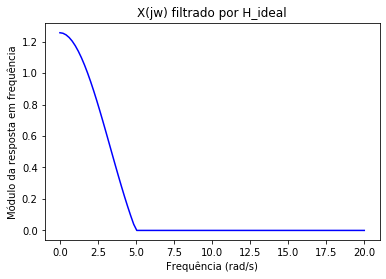

In [186]:
X_H_ideal= X*H_ideal
plt.title("X(jw) filtrado por H_ideal")
plt.xlabel("Frequência (rad/s)")
plt.ylabel("Módulo da resposta em frequência")
go = plt.plot(w, X_H_ideal, 'b')

###### 2.1 (f) Filtragem de x(t) por Chebyshev

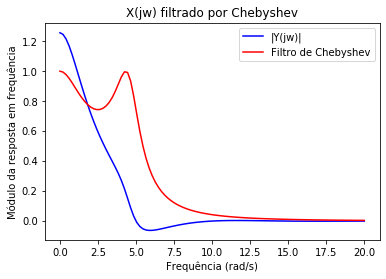

In [187]:
X_cheb5= X*cheb5
plt.title("X(jw) filtrado por Chebyshev")
plt.xlabel("Frequência (rad/s)")
plt.ylabel("Módulo da resposta em frequência")
go = plt.plot(w, X_cheb5, 'b', label="|Y(jw)|")
go = plt.plot(w, cheb5, 'r', label="Filtro de Chebyshev")
leg =plt.legend()

###### 2.1 (g) Filtragem de x(t) por Chebyshev

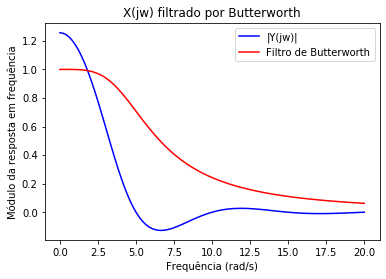

In [188]:
X_butter2= X*butter2
plt.title("X(jw) filtrado por Butterworth")
plt.xlabel("Frequência (rad/s)")
plt.ylabel("Módulo da resposta em frequência")
go = plt.plot(w, X_butter2, 'b', label="|Y(jw)|")
go = plt.plot(w, butter2, 'r', label="Filtro de Butterworth")
leg =plt.legend()

###### 2.1 (h) Comparação

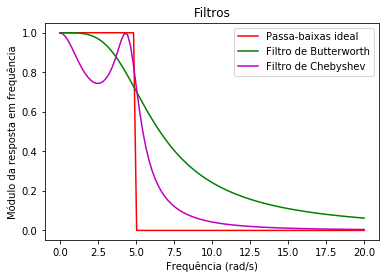

In [189]:
plt.title("Filtros")
plt.xlabel("Frequência (rad/s)")
plt.ylabel("Módulo da resposta em frequência")
go = plt.plot(w, H_ideal, 'r', label="Passa-baixas ideal")
go = plt.plot(w, butter2, 'g', label="Filtro de Butterworth")
go = plt.plot(w, cheb5, 'm', label="Filtro de Chebyshev")
leg =plt.legend()

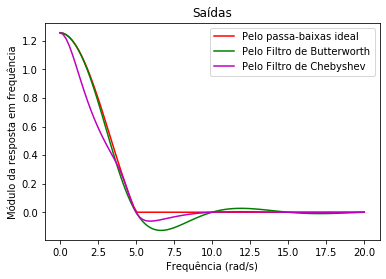

In [190]:
plt.title("Saídas")
plt.xlabel("Frequência (rad/s)")
plt.ylabel("Módulo da resposta em frequência")
go = plt.plot(w, X_H_ideal, 'r', label="Pelo passa-baixas ideal")
go = plt.plot(w, X_butter2, 'g', label="Pelo Filtro de Butterworth")
go = plt.plot(w, X_cheb5, 'm', label="Pelo Filtro de Chebyshev")
leg =plt.legend()

Comparando os resultados das filtragens, conclui-se que o filtro de Butterworth tem comportamento mais próximo do ideal no domínio menor que a frequência de corte, resultado esperado dada sua forma mais próxima ao ideal nessa região. Na mesma faixa do domínio é visível como o alto ganho na frequência de corte do filtro de Chebyshev, responsável pela forma de parábola no filtro, causa uma deformação considerável no sinal original. Já na faixa após a frequência de corte, o filtro de Chebyshev se comporta mais próximo do ideal, pois reproduz melhor a transição abrupta característica dele. Em uma aplicação prática, no qual supõe-se que um melhor filtro pass-baixas é aquele que melhor neutraliza o sinal depois da frequência de corte, o filtro de Chebyshev (supondo os parâmetros escolhidos) é o mais indicado.